In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
airpas = pd.read_csv(r'F:\DS\KAGGLE DATASET\Time Series\AirPassengers.csv')

In [6]:
airpas.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
airpas.shape

(144, 2)

Aim is to do forecast the next 1 year (next 12 month period)

In [8]:
airpas.Month = pd.to_datetime(airpas.Month, infer_datetime_format = True)
ind_airpas = airpas.set_index(['Month']) # month has been indexed
ind_airpas.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


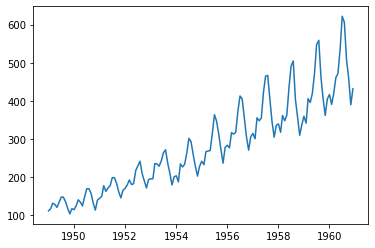

In [9]:
from datetime import datetime 
plt.plot(ind_airpas);

In [10]:
ind_airpas.diff()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


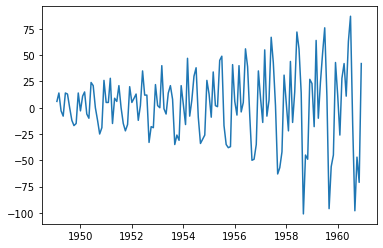

In [11]:
plt.plot(ind_airpas.diff());

In [12]:
ind_airpas.diff().diff().diff().diff().diff().diff().diff()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,623.0
1960-09-01,-16.0
1960-10-01,-518.0


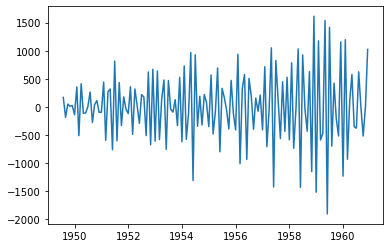

In [13]:
plt.plot(ind_airpas.diff().diff().diff().diff().diff().diff().diff());

In [14]:
ind_airpas.diff().diff().diff().diff().diff().diff().diff().diff()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,1001.0
1960-09-01,-639.0
1960-10-01,-502.0


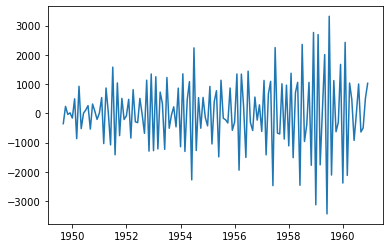

In [15]:
plt.plot(ind_airpas.diff().diff().diff().diff().diff().diff().diff().diff());

In [16]:
ind_airpas.diff().diff().diff().diff().diff().diff().diff().diff().diff()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,1027.0
1960-09-01,-1640.0
1960-10-01,137.0


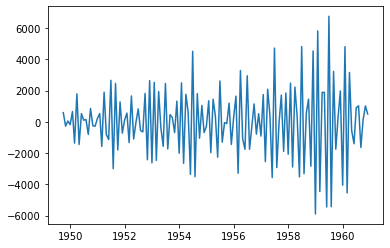

In [17]:
plt.plot(ind_airpas.diff().diff().diff().diff().diff().diff().diff().diff().diff());

* Just by taking diff it dosent get stationary thats why we taking log 

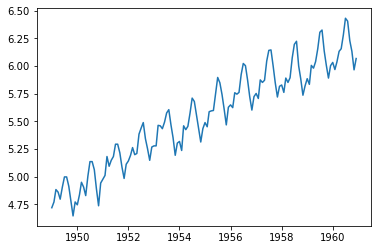

In [18]:
ind_airpas_log = np.log(ind_airpas)
plt.plot(ind_airpas_log);

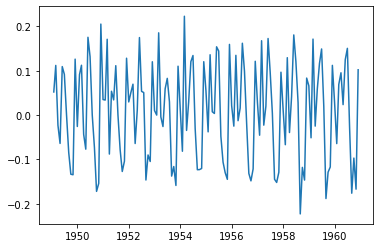

In [19]:
plt.plot(ind_airpas_log.diff());

In [20]:
ind_airpas_log.diff().head()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022


* now this is stationary
* now your base series is LOG_Series so your forcasted values would also be log so you need to take anti_log to get values in original scale 
* and your value of 'd = 1' because we diff only one
* now we have to find of value of p and q for this we have to plot ACF and PACF

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
plot_acf(ind_airpas_log.Passengers , lags = 40)

NameError: name 'ind_airpas_log' is not defined

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


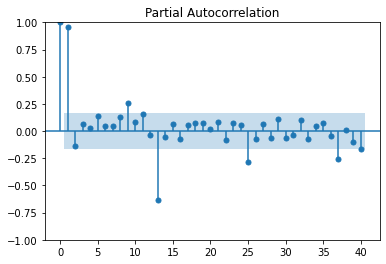

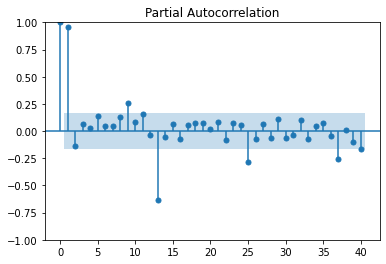

In [23]:
plot_pacf(ind_airpas_log.Passengers , lags = 40)

* Whatever values you get from acf and pacf of p and q so its just a   indication or just guidence its not mandnatory or comalsury to use you can deffinately change them

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
model = ARIMA(ind_airpas_log, order = (7,1,2))
result = model.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
result.params

ar.L1     1.286476
ar.L2    -0.914586
ar.L3     0.190249
ar.L4    -0.390974
ar.L5     0.338577
ar.L6    -0.206507
ar.L7    -0.267325
ma.L1    -1.624811
ma.L2     0.953981
sigma2    0.004688
dtype: float64

* model has been build now forecast


In [27]:
forecast_values = result.forecast(steps = 12)  # forecast for 12 months 
forecast_values

1961-01-01    6.092638
1961-02-01    6.048744
1961-03-01    6.065504
1961-04-01    6.102404
1961-05-01    6.211852
1961-06-01    6.371041
1961-07-01    6.429000
1961-08-01    6.372631
1961-09-01    6.255368
1961-10-01    6.129808
1961-11-01    6.063573
1961-12-01    6.050420
Freq: MS, Name: predicted_mean, dtype: float64

* ### forecast : ndarray
    Array of out of sample forecasts
* stderr : ndarray
    Array of the standard error of the forecasts.
* conf_int : ndarray
    2d array of the confidence interval for the forecast 
    ### Ignore 2 and 3 array and fetch 1 array values 

In [28]:
forecast_values

1961-01-01    6.092638
1961-02-01    6.048744
1961-03-01    6.065504
1961-04-01    6.102404
1961-05-01    6.211852
1961-06-01    6.371041
1961-07-01    6.429000
1961-08-01    6.372631
1961-09-01    6.255368
1961-10-01    6.129808
1961-11-01    6.063573
1961-12-01    6.050420
Freq: MS, Name: predicted_mean, dtype: float64

In [29]:
# take the exponential 
np.round(np.exp(forecast_values),2)  # This is the forcast for the year 1961

1961-01-01    442.59
1961-02-01    423.58
1961-03-01    430.74
1961-04-01    446.93
1961-05-01    498.62
1961-06-01    584.67
1961-07-01    619.55
1961-08-01    585.60
1961-09-01    520.80
1961-10-01    459.35
1961-11-01    429.91
1961-12-01    424.29
Freq: MS, Name: predicted_mean, dtype: float64

# we have done the forecast but how do you know the forecast is good or bad is ?
# we can take two apporches to evaluate the model 
# 1. is plot
# 2. use the sampling (sequential sampling)

# Below code is only plot of 1961

In [30]:
forecast_values = result.forecast(steps = 12)
forecast_values                  # forecast for 12 months 

1961-01-01    6.092638
1961-02-01    6.048744
1961-03-01    6.065504
1961-04-01    6.102404
1961-05-01    6.211852
1961-06-01    6.371041
1961-07-01    6.429000
1961-08-01    6.372631
1961-09-01    6.255368
1961-10-01    6.129808
1961-11-01    6.063573
1961-12-01    6.050420
Freq: MS, Name: predicted_mean, dtype: float64

In [31]:
forecast_values_df = pd.DataFrame(forecast_values )
forecast_values_df

,predicted_mean
1961-01-01,6.092638
1961-02-01,6.048744
1961-03-01,6.065504
1961-04-01,6.102404
1961-05-01,6.211852
1961-06-01,6.371041
1961-07-01,6.429000
1961-08-01,6.372631
1961-09-01,6.255368
1961-10-01,6.129808


In [32]:
forecast_values_df  = np.round(np.exp(forecast_values_df),2)
forecast_values_df 

,predicted_mean
1961-01-01,442.59
1961-02-01,423.58
1961-03-01,430.74
1961-04-01,446.93
1961-05-01,498.62
1961-06-01,584.67
1961-07-01,619.55
1961-08-01,585.60
1961-09-01,520.80
1961-10-01,459.35


In [33]:
forecast_values_df.reset_index(inplace = True)

In [34]:
forecast_values_df

,index,predicted_mean
0,1961-01-01,442.59
1,1961-02-01,423.58
2,1961-03-01,430.74
3,1961-04-01,446.93
4,1961-05-01,498.62
5,1961-06-01,584.67
6,1961-07-01,619.55
7,1961-08-01,585.60
8,1961-09-01,520.80
9,1961-10-01,459.35


In [35]:
forecast_values_df.rename(columns = {'index':'Month', 'predicted_mean':'predicted'}, inplace = True)

In [36]:
forecast_values_df

,Month,predicted
0,1961-01-01,442.59
1,1961-02-01,423.58
2,1961-03-01,430.74
3,1961-04-01,446.93
4,1961-05-01,498.62
5,1961-06-01,584.67
6,1961-07-01,619.55
7,1961-08-01,585.60
8,1961-09-01,520.80
9,1961-10-01,459.35


In [37]:
pred_airpas = forecast_values_df.set_index(['Month'])
pred_airpas

,predicted
Month,
1961-01-01,442.59
1961-02-01,423.58
1961-03-01,430.74
1961-04-01,446.93
1961-05-01,498.62
1961-06-01,584.67
1961-07-01,619.55
1961-08-01,585.60
1961-09-01,520.80


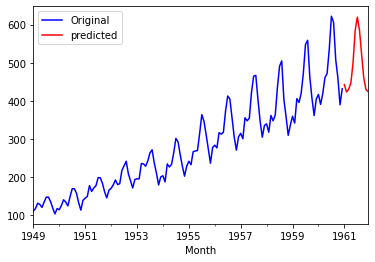

In [38]:
ind_airpas['Passengers'].plot(legend = True, label = 'Original', color = 'Blue')
pred_airpas['predicted'].plot(legend = True, label = 'predicted', color = 'red');

Trend wise it follows but seasionality wise it not follows so change the vlaues of p and q do not change d run it again (Final values of p,q = 7,2)

# Now lets do the sequential sampling

In [39]:
 airpas = pd.read_csv(r'F:\DS\KAGGLE DATASET\Time Series\AirPassengers.csv')

In [40]:
airpas.Month = pd.to_datetime(airpas.Month, infer_datetime_format = True)
ind_airpas = airpas.set_index(['Month'])

In [41]:
train = ind_airpas.iloc[0:132]   # 1949 to till 1959
test = ind_airpas.iloc[132:144]  # 1960

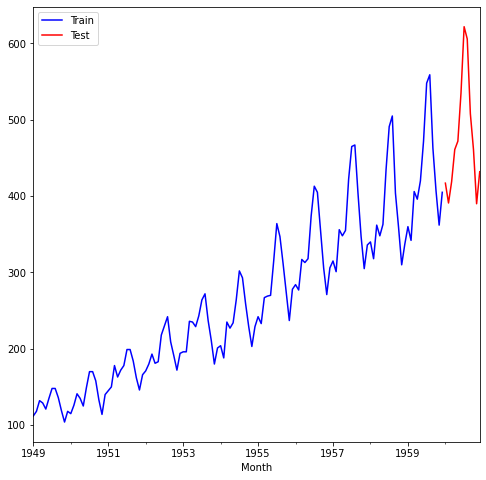

In [42]:
plt.figure(figsize = (8,8))
train['Passengers'].plot(legend = True, label = 'Train', color = 'Blue')
test['Passengers'].plot(legend = True, label = 'Test', color = 'red');


* basically i want to add one black line also for forecasted not only 1961 but also 1960 

In [43]:
train_log = np.log(train)

In [44]:
from statsmodels.tsa.arima.model import ARIMA

In [45]:
model = ARIMA(train_log, order = (7,1,2))
result = model.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
forecast_values = result.forecast(steps = 12)  # forecast for 12 months 
forecast_values

1960-01-01    6.010679
1960-02-01    5.993167
1960-03-01    6.007502
1960-04-01    6.041549
1960-05-01    6.155950
1960-06-01    6.302480
1960-07-01    6.337578
1960-08-01    6.264093
1960-09-01    6.136937
1960-10-01    6.017514
1960-11-01    5.973541
1960-12-01    5.984943
Freq: MS, Name: predicted_mean, dtype: float64

In [47]:
forecast_values_df = pd.DataFrame(forecast_values)

In [48]:
forecast_values_df

,predicted_mean
1960-01-01,6.010679
1960-02-01,5.993167
1960-03-01,6.007502
1960-04-01,6.041549
1960-05-01,6.155950
1960-06-01,6.302480
1960-07-01,6.337578
1960-08-01,6.264093
1960-09-01,6.136937
1960-10-01,6.017514


In [49]:
forecast_values_df  = np.round(np.exp(forecast_values_df),2)
forecast_values_df 

,predicted_mean
1960-01-01,407.76
1960-02-01,400.68
1960-03-01,406.47
1960-04-01,420.54
1960-05-01,471.51
1960-06-01,545.92
1960-07-01,565.43
1960-08-01,525.36
1960-09-01,462.63
1960-10-01,410.56


In [50]:
forecast_values_df.reset_index(inplace = True)
forecast_values_df

,index,predicted_mean
0,1960-01-01,407.76
1,1960-02-01,400.68
2,1960-03-01,406.47
3,1960-04-01,420.54
4,1960-05-01,471.51
5,1960-06-01,545.92
6,1960-07-01,565.43
7,1960-08-01,525.36
8,1960-09-01,462.63
9,1960-10-01,410.56


In [51]:
forecast_values_df.rename(columns = {'index':'Month', 'predicted_mean':'Passengers'}, inplace = True)

In [52]:
forecast_values_df

,Month,Passengers
0,1960-01-01,407.76
1,1960-02-01,400.68
2,1960-03-01,406.47
3,1960-04-01,420.54
4,1960-05-01,471.51
5,1960-06-01,545.92
6,1960-07-01,565.43
7,1960-08-01,525.36
8,1960-09-01,462.63
9,1960-10-01,410.56


In [53]:
forecast_values_df.Month = pd.to_datetime(forecast_values_df.Month,infer_datetime_format = True)

In [54]:
forecast_values_df = forecast_values_df.set_index(['Month'])
forecast_values_df

,Passengers
Month,
1960-01-01,407.76
1960-02-01,400.68
1960-03-01,406.47
1960-04-01,420.54
1960-05-01,471.51
1960-06-01,545.92
1960-07-01,565.43
1960-08-01,525.36
1960-09-01,462.63


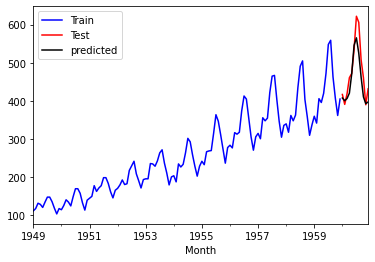

In [55]:
train['Passengers'].plot(legend = True, label = 'Train', color = 'Blue')
test['Passengers'].plot(legend = True, label = 'Test', color = 'red')
forecast_values_df['Passengers'].plot(legend = True, label = 'predicted', color = 'black');

In [56]:
# date_for_pred = ['1960-01-01','1960-02-01','1960-03-01','1960-04-01',
#                 '1960-05-01','1960-06-01','1960-07-01','1960-08-01','1960-09-01',
#                 '1960-10-01','1960-11-01','1960-12-01']

# 2. use the sampling (sequential sampling)

In [57]:
model = ARIMA(train_log, order = (7,1,2))
result = model.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
forecast_values = result.forecast(steps = 12)  # forecast for 12 months 
forecast_values

1960-01-01    6.010679
1960-02-01    5.993167
1960-03-01    6.007502
1960-04-01    6.041549
1960-05-01    6.155950
1960-06-01    6.302480
1960-07-01    6.337578
1960-08-01    6.264093
1960-09-01    6.136937
1960-10-01    6.017514
1960-11-01    5.973541
1960-12-01    5.984943
Freq: MS, Name: predicted_mean, dtype: float64

In [59]:
forecast_values212 = forecast_values

In [60]:
forecast_values212 =np.exp(forecast_values212)
forecast_values212 

1960-01-01    407.759906
1960-02-01    400.681499
1960-03-01    406.466763
1960-04-01    420.543791
1960-05-01    471.514765
1960-06-01    545.923910
1960-07-01    565.425446
1960-08-01    525.364816
1960-09-01    462.634273
1960-10-01    410.556827
1960-11-01    392.894609
1960-12-01    397.399734
Freq: MS, Name: predicted_mean, dtype: float64

In [61]:
from sklearn.metrics import mean_squared_error
mse212 = mean_squared_error(forecast_values212 , test )
print(mse212)

1466.9414970294456


Arima cannot handle seasonality 

* weather it has seasionality or not always use SARIMA 
* it handle seasionality by taking auto ARIMA 
* in auto ARIMA tries various combination of p d and q 

# Auto ARIMA and SARIMA

In [62]:
#!pip install pmdarima

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

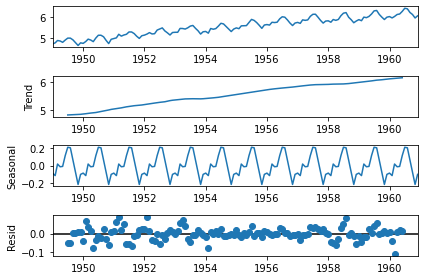

In [65]:
result = seasonal_decompose(ind_airpas_log)
result.plot();

In [66]:
auto_arima(ind_airpas_log,seasonal = True, m=12)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [67]:
model_sarima = SARIMAX(ind_airpas_log,order =(2,0,0),seasonal_order = (0,1,1,12))
result=model_sarima.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [68]:
abc = result.predict(start=132,end=143) # predicted values
abc

1960-01-01    6.039158
1960-02-01    5.984858
1960-03-01    6.128332
1960-04-01    6.039652
1960-05-01    6.131217
1960-06-01    6.305668
1960-07-01    6.415886
1960-08-01    6.436474
1960-09-01    6.238391
1960-10-01    6.097047
1960-11-01    5.991881
1960-12-01    6.083814
Freq: MS, Name: predicted_mean, dtype: float64

In [69]:
abc = result.predict(start=144,end=155) # predicted values
abc

1961-01-01    6.103815
1961-02-01    6.045729
1961-03-01    6.162303
1961-04-01    6.188879
1961-05-01    6.220920
1961-06-01    6.355813
1961-07-01    6.493196
1961-08-01    6.487523
1961-09-01    6.307990
1961-10-01    6.191170
1961-11-01    6.044355
1961-12-01    6.147650
Freq: MS, Name: predicted_mean, dtype: float64

In [70]:
pred = result.predict(start=132,end=143)
actual_pred = np.exp(pred)
actual_pred                           # in last year

1960-01-01    419.539791
1960-02-01    397.366227
1960-03-01    458.670492
1960-04-01    419.746833
1960-05-01    459.995631
1960-06-01    547.667513
1960-07-01    611.482507
1960-08-01    624.201990
1960-09-01    512.034151
1960-10-01    444.543044
1960-11-01    400.166699
1960-12-01    438.699232
Freq: MS, Name: predicted_mean, dtype: float64

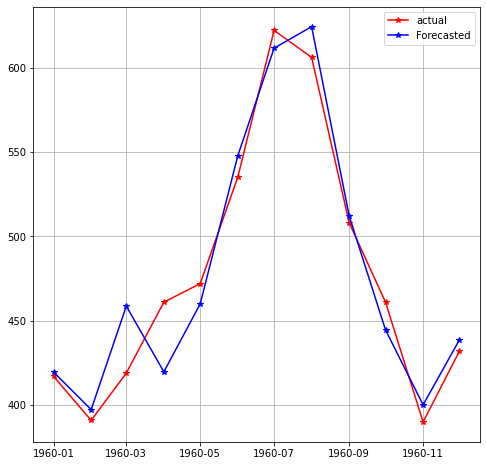

In [71]:
plt.figure(figsize= (8, 8))

plt.plot(ind_airpas [132:144], marker ="*", color="r", label = "actual")
plt.plot(actual_pred, color ="b", label="Forecasted", marker ="*") 
plt.legend()
plt.grid()# we can see that our model is doing actually very good prediction plt.grid()

In [72]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ind_airpas[132:144] , actual_pred )

1466.9414970294456


In [75]:
next12 = result.predict(start = 144 ,end = 155) # prediction for next 12 months
next12 = np.exp(next12)
next12

1961-01-01    447.562028
1961-02-01    422.305710
1961-03-01    474.519788
1961-04-01    487.299769
1961-05-01    503.165708
1961-06-01    575.830349
1961-07-01    660.631403
1961-08-01    656.894208
1961-09-01    548.940697
1961-10-01    488.417412
1961-11-01    421.725757
1961-12-01    467.617291
Freq: MS, Name: predicted_mean, dtype: float64

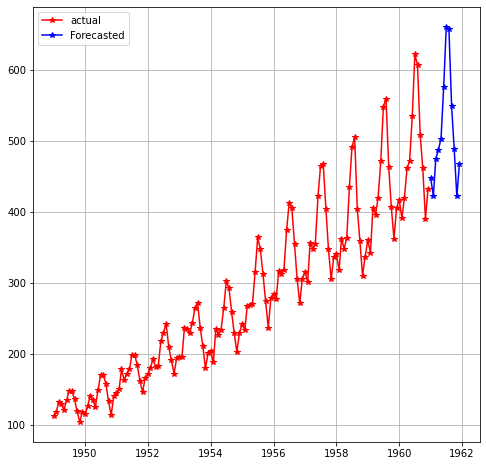

In [76]:
plt.figure(figsize= (8, 8))

plt.plot(ind_airpas, marker ="*", color="r", label = "actual")
plt.plot(next12, color ="b", label="Forecasted", marker ="*") 
plt.legend()   # We can see that our model is doing actully very good prediction
plt.grid()

In [77]:
from statsmodels.tsa.stattools import adfuller

In [78]:
airpas = pd.read_csv(r'F:\DS\KAGGLE DATASET\Time Series\AirPassengers.csv')

# Agumented dicky fuller test (ADF)
#### Null Hypothesis is that NULL is not stationary
#### Alternate Hypothesis is that series is stationaty
#### If the p value is less than 0.05 reject the null

In [79]:
adfuller(airpas.Passengers)

(0.8153688792060518,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

p value is more than 0.05 so we fail to reject the null

In [90]:
dftest = adfuller(np.log(airpas.Passengers).diff().dropna())
p_value=dftest[1]
if p_value < 0.05:
    print(" p-value is ",      p_value)
    print(" Since P Value is less than .05, Null hypothesis is rejected ")
    print('series is stationary')
else:
    print("P-value is ",       p_value)
    print(" Since P Value is greater than .05, we FAIL to reject the NULL") 
    print('Data is non_Stationary')      

P-value is  0.0711205481508603
 Since P Value is greater than .05, we FAIL to reject the NULL
Data is non_Stationary


# kwaitkowaski-phillips-Schmidt-shin(kpss)
#### Null Hypothesis in kpss test is that series is stationary


In [92]:
from statsmodels.tsa.stattools import kpss
kpss(airpas.Passengers)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.6513122354165206,
 0.01,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [93]:
cal_value,p_value,lags,critical_values = kpss(airpas.Passengers)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [94]:

if p_value > 0.05:
    print(" p-value is ",      p_value)
    print(" Since P Value is greater than .05, we fail to reject the Null Hypothesis  ")
    print('series is stationary')
else:
    print("P-value is ",       p_value)
    print(" Since P Value is less than .05, we reject the NULL Hypothsis") 
    print('Data is non_Stationary') 
    

P-value is  0.01
 Since P Value is less than .05, we reject the NULL Hypothsis
Data is non_Stationary


In [95]:
# pip install pywedge

In [99]:
# pip install ipython

Note: you may need to restart the kernel to use updated packages.


In [110]:
import IPython

In [111]:
from IPython.core.display import display,HTML

In [120]:
import pywedge as pw
import pandas as pd

In [121]:
cr = pd.read_csv(r"F:\DS\PANDAS 2\CreditRisk.csv ")
cr = cr.dropna()

In [124]:
draw_chart = pw.Pywedge_Charts(cr,c='Loan_ID',y='Gender')

C:\Users\DELL\anaconda3\lib\site-packages\pywedge\pywedge.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  self.X = self.train.drop(self.y,1)


In [125]:
plots = draw_chart.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

C:\Users\DELL\anaconda3\lib\site-packages\pywedge\pywedge.py:49: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
# pip install Dtale

In [138]:
import dtale

In [139]:
cr = pd.read_csv(r"F:\DS\PANDAS 2\CreditRisk.csv ")
cr = cr.dropna()

In [140]:
dtale.show()

Exception occurred while processing request: 'NoneType' object is not iterable
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\dtale\views.py", line 120, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\dtale\views.py", line 2480, in get_data
    curr_dtypes = [c["name"] for c in global_state.get_dtypes(data_id)]
TypeError: 'NoneType' object is not iterable


2022-09-06 18:06:54,756 - ERROR    - Exception occurred while processing request: 'NoneType' object is not iterable
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\dtale\views.py", line 120, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\dtale\views.py", line 2480, in get_data
    curr_dtypes = [c["name"] for c in global_state.get_dtypes(data_id)]
TypeError: 'NoneType' object is not iterable
